# Chaotic motion of Double pendulum

[https://github.com/Souvik-0612/Classical-mechanics-/blob/main/Notes%20created%20by%20me/Double%20Pendulum%20.pdf]!(Derivation)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid'])
from numpy import sin, cos, pi
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

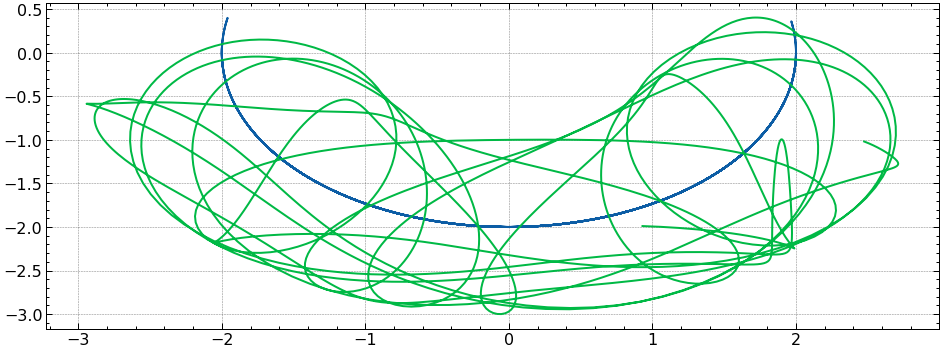

In [23]:
#initial conditions
ti = 0; tf = 20; w1 = 1.5; w2 = -1; w3 = 0.5 ; w4 = 2; h = 0.01
t = np.arange(ti, tf+h, h)

#Parameter 
l1 = 2; l2 = 1; m1 = 1; m2 = 1; g = 9.8

tht = [w1]; phi = [w3]

for _ in range(len(t)-1):
    
    w1_ = w1 + h*w2
    w2_ = w2 + h*(1/((m1+m2)*l1 - m2*l1*(cos(w1 - w3))**2))*(m2*g*sin(w3)*cos(w1-w3) - m2*l1*sin(w1 - w3)*cos(w1-w3)*w2**2 - (m1+m2)*g*sin(w1))
    w3_ = w3 + h*w4
    w4_ = w4 + h*(1/(l2 - m2*l2*(cos(w1-w3))**2/(m1+m2)))*(l1*w2**2*sin(w1- w3) - g*sin(w3) + g*sin(w1)*cos(w1-w3) + m2*l2*cos(w1-w3)*sin(w1-w3)*w4**2/(m1+m2))
    
    tht.append(w1)
    phi.append(w3)
    
    w1 = w1_; w2 = w2_; w3 = w3_; w4 = w4_
    

tht = np.array(tht); phi = np.array(phi)

x1 = l1*sin(tht); y1 = -l1*cos(tht)
x2 = l1*sin(tht) + l2*sin(phi); y2 = - (l1*cos(tht) + l2*cos(phi))

plt.figure(figsize = (16, 6))
plt.plot(x1, y1,x2, y2)
plt.show()

In [24]:
len(t)

2002

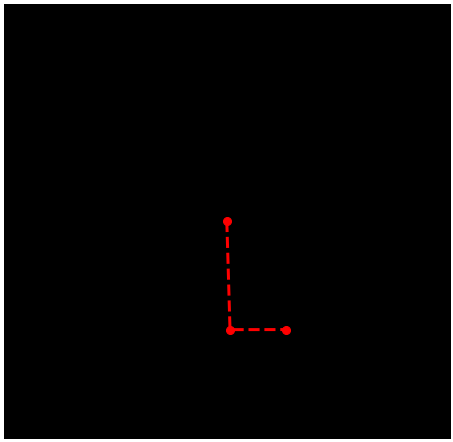

In [25]:
def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
ani = animation.FuncAnimation(fig, animate, frames=2000, interval=50)
ani.save('pendulum1.gif',writer='pillow',fps=100)